# Execution of different clique finding algorithms

In [ ]:
from libs import *
files = {
    "sparse_multi_small" : "graphs/multiple/sparse_multiple_small_cliques.json",
    "dense_multi_small" : "graphs/multiple/dense_multiple_small_cliques.json",
}

In [16]:
sparse_multi_small = files["sparse_multi_small"]
G_sparse_multi_small = load_graph_from_json(sparse_multi_small)
sparse_multi_small_largest = set(analyze_graph(G_sparse_multi_small))


Graph Analysis:
Number of nodes: 163
Number of edges: 1879
Average degree: 23.06
Density: 0.142
Maximum clique: {'67', '73', '72', '71', '70', '65', '69', '66', '74', '68'}


In [17]:
print(f"Sparse multi small max clique len: {len(sparse_multi_small_largest)}")

Sparse multi small max clique len: 10


In [18]:
dense_multi_small = files["dense_multi_small"]
G_dense_multi_small = load_graph_from_json(dense_multi_small)
dense_multi_small_largest = set(analyze_graph(G_dense_multi_small))

Graph Analysis:
Number of nodes: 135
Number of edges: 4914
Average degree: 72.80
Density: 0.543
Maximum clique: {'48', '0', '86', '79', '1', '15', '83', '3', '114', '84', '85', '65', '42', '14', '107', '62', '87', '56'}


In [19]:
print(f"Dense multi smal max clique len: {len(dense_multi_small_largest)}")

Dense multi smal max clique len: 18


In [20]:
print(f"Size of max clique for sparse: {len(sparse_multi_small_largest)}")
print(f"Size of max clique for dense: {len(dense_multi_small_largest)}")

Size of max clique for sparse: 10
Size of max clique for dense: 18


# Sparsely connected graph with many small cliques

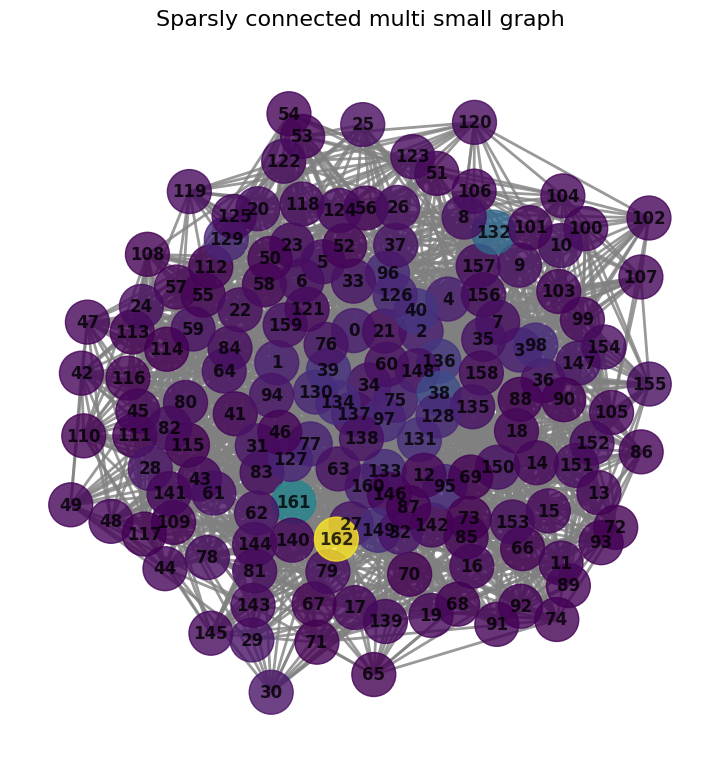

In [21]:
visualize_graph_customized(G_sparse_multi_small, "Sparsly connected multi small graph", layout="spring", dims=(7, 7))

In [22]:
print("Carraghan-Pardalos experiment")
# cp_solver: CarraghanPardalosCF = CarraghanPardalosCF(G_nc_small)
# nc_small_max_clique_cp: set = cp_solver.find_maximum_clique()
nc_small_max_clique_cp = optimized_carraghan_pardalos(G_sparse_multi_small)
nc_small_intersection_set_cp = sparse_multi_small_largest.intersection(nc_small_max_clique_cp)

print(f"Maximum clique {len(nc_small_max_clique_cp)}: {nc_small_max_clique_cp}")
print(f"CP intersection set {len(nc_small_intersection_set_cp)}: {nc_small_intersection_set_cp}")
print("-"*100)



Carraghan-Pardalos experiment
optimized_carraghan_pardalos took 0.0039389578 seconds to execute
Maximum clique 10: {'67', '73', '72', '70', '71', '65', '69', '66', '74', '68'}
CP intersection set 10: {'67', '73', '72', '71', '70', '65', '69', '66', '74', '68'}
----------------------------------------------------------------------------------------------------


In [23]:
print("Bron-Kerbosh experiment")
bk_solver = BronKerbosch(G_sparse_multi_small)
nc_small_max_clique_bk: set = bk_solver.find_max_clique()
nc_small_intersection_set_bk = sparse_multi_small_largest.intersection(nc_small_max_clique_bk)

print(f"Maximum clique {len(nc_small_max_clique_bk)} {type(nc_small_max_clique_bk)}: {nc_small_max_clique_bk}")
print(f"BK intersection set {len(nc_small_intersection_set_bk)}: {nc_small_intersection_set_bk}")
print("-"*100)




Bron-Kerbosh experiment
find_max_clique took 0.0085735412 seconds to execute
Maximum clique 10 <class 'set'>: {'115', '109', '111', '110', '117', '114', '108', '113', '116', '112'}
BK intersection set 0: set()
----------------------------------------------------------------------------------------------------


In [24]:
print("Tabu-Search experiment")
tabu_solver: TabuCliqueFinder = TabuCliqueFinder(G_sparse_multi_small, tabu_tenure=20, max_iterations=300)
nc_small_max_clique_tabu: set = tabu_solver.find_maximum_clique()
nc_small_intersection_set_tabu = sparse_multi_small_largest.intersection(nc_small_max_clique_tabu)

print(f"Maximum clique {len(nc_small_max_clique_tabu)}: {nc_small_max_clique_tabu}")
print(f"Tabu intersection set {len(nc_small_intersection_set_tabu)}: {nc_small_intersection_set_tabu}")
print("-"*100)

Tabu-Search experiment
find_maximum_clique took 0.0222947081 seconds to execute
Maximum clique 7: {'81', '79', '84', '82', '78', '80', '83'}
Tabu intersection set 0: set()
----------------------------------------------------------------------------------------------------


In [36]:
nodes: int = G_sparse_multi_small.number_of_nodes() 
tabu_tenure: int = nodes // 4

print(f"Nodes: {nodes}")

print("Tuned Tabu-Search experiment")
tabu_solver_2: TabuCliqueFinder = TabuCliqueFinder(G_sparse_multi_small, tabu_tenure=tabu_tenure, max_iterations=300)
sparse_multi_small_max_clique_tabu_2: set = tabu_solver_2.find_maximum_clique()
sparse_multi_small_intersection_set_tabu_2 = sparse_multi_small_largest.intersection(sparse_multi_small_max_clique_tabu_2)

print(f"Maximum clique {len(sparse_multi_small_max_clique_tabu_2)}: {sparse_multi_small_max_clique_tabu_2}")
print(f"Tabu intersection set {len(sparse_multi_small_intersection_set_tabu_2)}: {sparse_multi_small_intersection_set_tabu_2}")
print("-"*100)

Nodes: 163
Tuned Tabu-Search experiment
find_maximum_clique took 0.0216022911 seconds to execute
Maximum clique 8: {'155', '153', '154', '157', '152', '151', '156', '158'}
Tabu intersection set 0: set()
----------------------------------------------------------------------------------------------------


## Densely connected graph with many small cliques

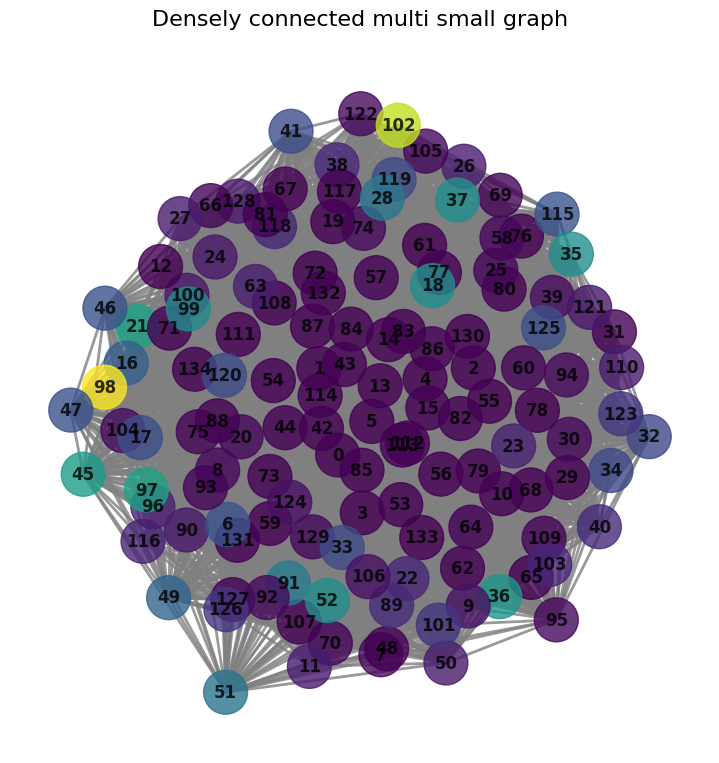

In [26]:
visualize_graph_customized(G_dense_multi_small, "Densely connected multi small graph", layout="spring", dims=(7, 7))


In [ ]:
print("Carraghan-Pardalos experiment")
# cp_solver: CarraghanPardalosCF = CarraghanPardalosCF(G_nc_small)
# nc_small_max_clique_cp: set = cp_solver.find_maximum_clique()
dense_multi_small_max_clique_cp = optimized_carraghan_pardalos(G_dense_multi_small)
dense_multi_small_intersection_set_cp = dense_multi_small_largest.intersection(nc_small_max_clique_cp)

print(f"Maximum clique {len(dense_multi_small_max_clique_cp)}: {dense_multi_small_max_clique_cp}")
print(f"CP intersection set {len(dense_multi_small_intersection_set_cp)}: {dense_multi_small_intersection_set_cp}")
print("-"*100)

Carraghan-Pardalos experiment
optimized_carraghan_pardalos took 18.4014850000 seconds to execute
Maximum clique 18: {'13', '1', '83', '3', '114', '84', '112', '87', '56', '0', '86', '79', '15', '133', '85', '134', '42', '14'}
CP intersection set 1: {'65'}
----------------------------------------------------------------------------------------------------


In [ ]:
print("Bron-Kerbosh experiment")
bk_solver = BronKerbosch(G_dense_multi_small)
dense_multi_small_max_clique_bk: set = bk_solver.find_max_clique()
dense_multi_small_intersection_set_bk = dense_multi_small_largest.intersection(dense_multi_small_max_clique_bk)

print(f"Maximum clique {len(dense_multi_small_max_clique_bk)} {type(dense_multi_small_max_clique_bk)}: {dense_multi_small_max_clique_bk}")
print(f"BK intersection set {len(dense_multi_small_intersection_set_bk)}: {dense_multi_small_intersection_set_bk}")
print("-"*100)

Bron-Kerbosh experiment
find_max_clique took 0.7648129161 seconds to execute
Maximum clique 18 <class 'set'>: {'1', '13', '83', '3', '114', '84', '112', '87', '56', '0', '86', '79', '15', '133', '85', '134', '42', '14'}
BK intersection set 14: {'0', '86', '79', '1', '15', '83', '3', '114', '84', '85', '42', '14', '87', '56'}
----------------------------------------------------------------------------------------------------


In [29]:
print("Tabu-Search experiment")
tabu_solver: TabuCliqueFinder = TabuCliqueFinder(G_dense_multi_small, tabu_tenure=20, max_iterations=300)
dense_multi_small_max_clique_tabu: set = tabu_solver.find_maximum_clique()
dense_multi_small_intersection_set_tabu = dense_multi_small_largest.intersection(dense_multi_small_max_clique_tabu)

print(f"Maximum clique {len(dense_multi_small_max_clique_tabu)}: {dense_multi_small_max_clique_tabu}")
print(f"Tabu intersection set {len(dense_multi_small_intersection_set_tabu)}: {dense_multi_small_intersection_set_tabu}")
print("-"*100)

Tabu-Search experiment
find_maximum_clique took 0.0802405830 seconds to execute
Maximum clique 16: {'80', '4', '55', '84', '113', '82', '0', '86', '15', '77', '5', '81', '85', '42', '14', '53'}
Tabu intersection set 7: {'0', '86', '15', '84', '85', '42', '14'}
----------------------------------------------------------------------------------------------------


In [39]:
nodes: int = G_dense_multi_small.number_of_nodes() 
tabu_tenure: int = nodes // 4

print(f"Nodes: {nodes}")

print("Tuned Tabu-Search experiment")
tabu_solver_2: TabuCliqueFinder = TabuCliqueFinder(G_dense_multi_small, tabu_tenure=tabu_tenure, max_iterations=300)
dense_multi_small_max_clique_tabu_2: set = tabu_solver_2.find_maximum_clique()
dense_multi_small_intersection_set_tabu_2 = dense_multi_small_largest.intersection(dense_multi_small_max_clique_tabu_2)

print(f"Maximum clique {len(dense_multi_small_max_clique_tabu_2)}: {dense_multi_small_max_clique_tabu_2}")
print(f"Tabu intersection set {len(dense_multi_small_intersection_set_tabu_2)}: {dense_multi_small_intersection_set_tabu_2}")
print("-"*100)

Nodes: 135
Tuned Tabu-Search experiment
find_maximum_clique took 0.0844324168 seconds to execute
Maximum clique 17: {'13', '3', '114', '84', '112', '87', '56', '0', '86', '79', '15', '133', '77', '85', '134', '42', '14'}
Tabu intersection set 12: {'0', '86', '79', '15', '3', '114', '84', '85', '42', '14', '87', '56'}
----------------------------------------------------------------------------------------------------
